In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from jutge import *
from jutgeAnalyser import *

from scipy.stats.mstats import kendalltau, spearmanr

import psycopg2
dbname = "test1"
con = psycopg2.connect("dbname=%s" % dbname)

# Get first words of ervery course title

In [42]:
    titles = pd.read_sql_query("select title from courses ;", con=con)

In [43]:
def split(x):
    return x.split()[0]

In [44]:
kw = titles.title.apply(split)
kw.name = "kw"

<IPython.core.display.Javascript object>


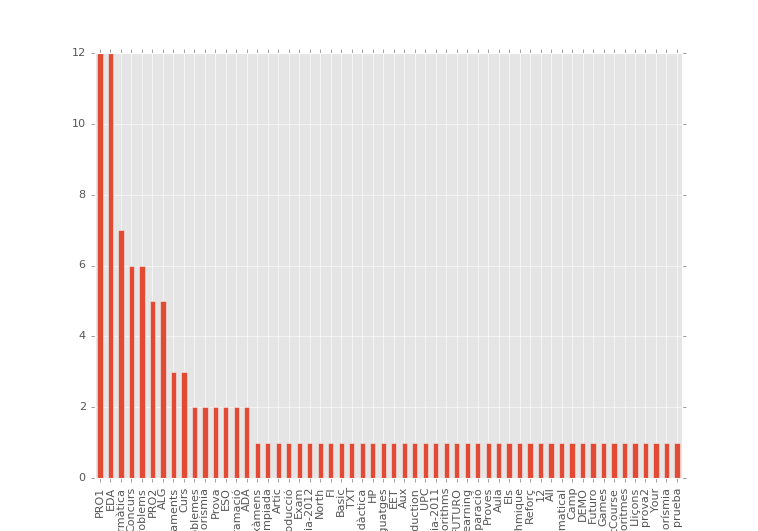

In [45]:
kw_vc = kw.value_counts()
kw_vc.plot(kind='bar')

In [46]:
titles = titles.join(kw)
titles

,title,kw
0,EDA Curs 2010/2011 Q1,EDA
1,PRO1 TARDOR 2011,PRO1
2,All problems,All
3,Basic Mechanics,Basic
4,Problems on Circuits,Problems
5,PRO1 TARDOR 2010,PRO1
6,EDA Curs 2010/2011 Q2,EDA
7,ADA Curs 2010/2011 Q1,ADA
8,Exàmens de P1,Exàmens
9,PRO1 PRIMAVERA 2011,PRO1


In [52]:
titles[titles.kw == kw_vc.index[0]]

,title,kw
1,PRO1 TARDOR 2011,PRO1
5,PRO1 TARDOR 2010,PRO1
9,PRO1 PRIMAVERA 2011,PRO1
24,PRO1 PRIMAVERA 2012,PRO1
34,PRO1 PRIMAVERA 2015,PRO1
42,PRO1 TARDOR 2013,PRO1
60,PRO1 TARDOR 2012,PRO1
71,PRO1 PRIMAVERA 2013,PRO1
73,PRO1 Q2 2015-2016,PRO1
85,PRO1 PRIMAVERA 2014,PRO1


In [53]:
titles[titles.kw == kw_vc.index[1]]

,title,kw
0,EDA Curs 2010/2011 Q1,EDA
6,EDA Curs 2010/2011 Q2,EDA
20,EDA Curs 2011/2012 Q1,EDA
26,EDA Curs 2011/2012 Q2,EDA
32,EDA Curs 2014/2015 Q2,EDA
41,EDA Curs 2013/2014 Q1,EDA
51,EDA Curs 2015/2016 Q2,EDA
54,EDA Curs 2012/2013 Q2,EDA
68,EDA Curs 2012/2013 Q1,EDA
86,EDA Curs 2013/2014 Q2,EDA


In [54]:
titles[titles.kw == kw_vc.index[2]]

,title,kw
21,Informàtica Q1 fme,Informàtica
63,Informàtica ESO III,Informàtica
66,Informàtica fme (1213Q1),Informàtica
70,Informàtica fme (1314Q1),Informàtica
75,Informàtica FME (2013-2014),Informàtica
98,Informàtica FME (2014-2015),Informàtica
104,Informàtica FME (Tardor 2015),Informàtica


In [55]:
titles[titles.kw == kw_vc.index[3]]

,title,kw
40,Concurs UPF 2015,Concurs
47,Concurs de Programació Literària de Sant Jordi,Concurs
48,Concurs UPF 2011,Concurs
55,Concurs UPF 2012,Concurs
62,Concurs UPF 2013,Concurs
91,Concurs UPF 2014,Concurs


In [56]:
titles[titles.kw == kw_vc.index[4]]

,title,kw
4,Problems on Circuits,Problems
12,Problems on Physics,Problems
27,Problems from the FME Contests,Problems
44,Problems from the UPC Contests,Problems
46,Problems from the Exams on Algorithms,Problems
64,Problems from the I1 Exams,Problems


In [77]:
for kw in kw_vc.index:
    if kw.isupper():
        print kw
        # titles[titles.kw == kw]

PRO1
EDA
PRO2
ALG
ESO
ADA
FI
TXT
HP
EET
UPC
FUTURO
DEMO


In [78]:
[kw for kw in kw_vc.index if kw.isupper()]

['PRO1',
 'EDA',
 'PRO2',
 'ALG',
 'ESO',
 'ADA',
 'FI',
 'TXT',
 'HP',
 'EET',
 'UPC',
 'FUTURO',
 'DEMO']